# Vehicle detection and counting system
##  Using deep learning in highway scenes 
###   Final Year Project 


#####  * Importing library 

In [61]:
import numpy as np
import cv2
from PIL import Image ,ImageEnhance

#####  * Input Image Details

In [62]:
#Image Path ,Output path and Image name
file='E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000003.jpg'
image_name='000003'
results_folder_path='E:/code/Vehicle_Count/Traffic_Signs_Dataset/results'

#####  * Enhancing the Image Saturation

In [63]:
img = Image.open(file)
converter = ImageEnhance.Color(img)
img_enhance = converter.enhance(12)

#####  * Creating Green mask to remove unnecessary background

In [64]:
# Open image and make RGB and HSV versions
RGBim = img_enhance
HSVim = RGBim.convert('HSV')

# Make numpy versions
RGBna = np.array(RGBim)
HSVna = np.array(HSVim)

# Extract Hue
H = HSVna[:,:,0]

# Find all green pixels, i.e. where 100 < Hue < 140
lo,hi = 100,150
# Rescale to 0-255, rather than 0-360 because we are using uint8
lo = int((lo * 255) / 360)
hi = int((hi * 255) / 360)
green = np.where((H>lo) & (H<hi))

#####  * Define detecting image path

In [65]:
detecting_image_path=results_folder_path+'/'+image_name+'_green_mask_remove.jpg'

#####  *  Removing unnecessary background in input image using green mask

In [66]:
RGBim = Image.open(file).convert('RGB')

# Make numpy versions
RGBna = np.array(RGBim)
# Make all green pixels black in input image
RGBna[green] = [96,96,96]
count = green[0].size

#####  * Saving detecting image

In [67]:
# print("Pixels matched: {}".format(count))
Image.fromarray(RGBna).save(detecting_image_path)

In [68]:
#Derecting to YOLO network 
%cd YoloV5

[WinError 2] The system cannot find the file specified: 'YoloV5'
E:\code\Vehicle_Count\Traffic_Signs_Dataset\YoloV5


#####  * Predicting using YOLO newtwork 

In [69]:
!python detect.py --source {detecting_image_path} --conf 0.25 --save-txt --save-conf --project {results_folder_path}

detect: weights=yolov5s.pt, source=E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000003_green_mask_remove.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=E:/code/Vehicle_Count/Traffic_Signs_Dataset/results, name=, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-253-g75bbaa8 Python-3.10.4 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
truck 0.30
car 0.36
bus 0.55
truck 0.57
truck 0.64
car 0.66
truck 0.68
car 0.84
Speed: 1.0ms pre-process, 206.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to E:\code\Vehicle_Count\Traffic_Signs_Dataset\results
4 labels saved to E:\code\Vehicle_Count\Traffic_Signs_Dataset\results\labels


#####  * Display Output Image 

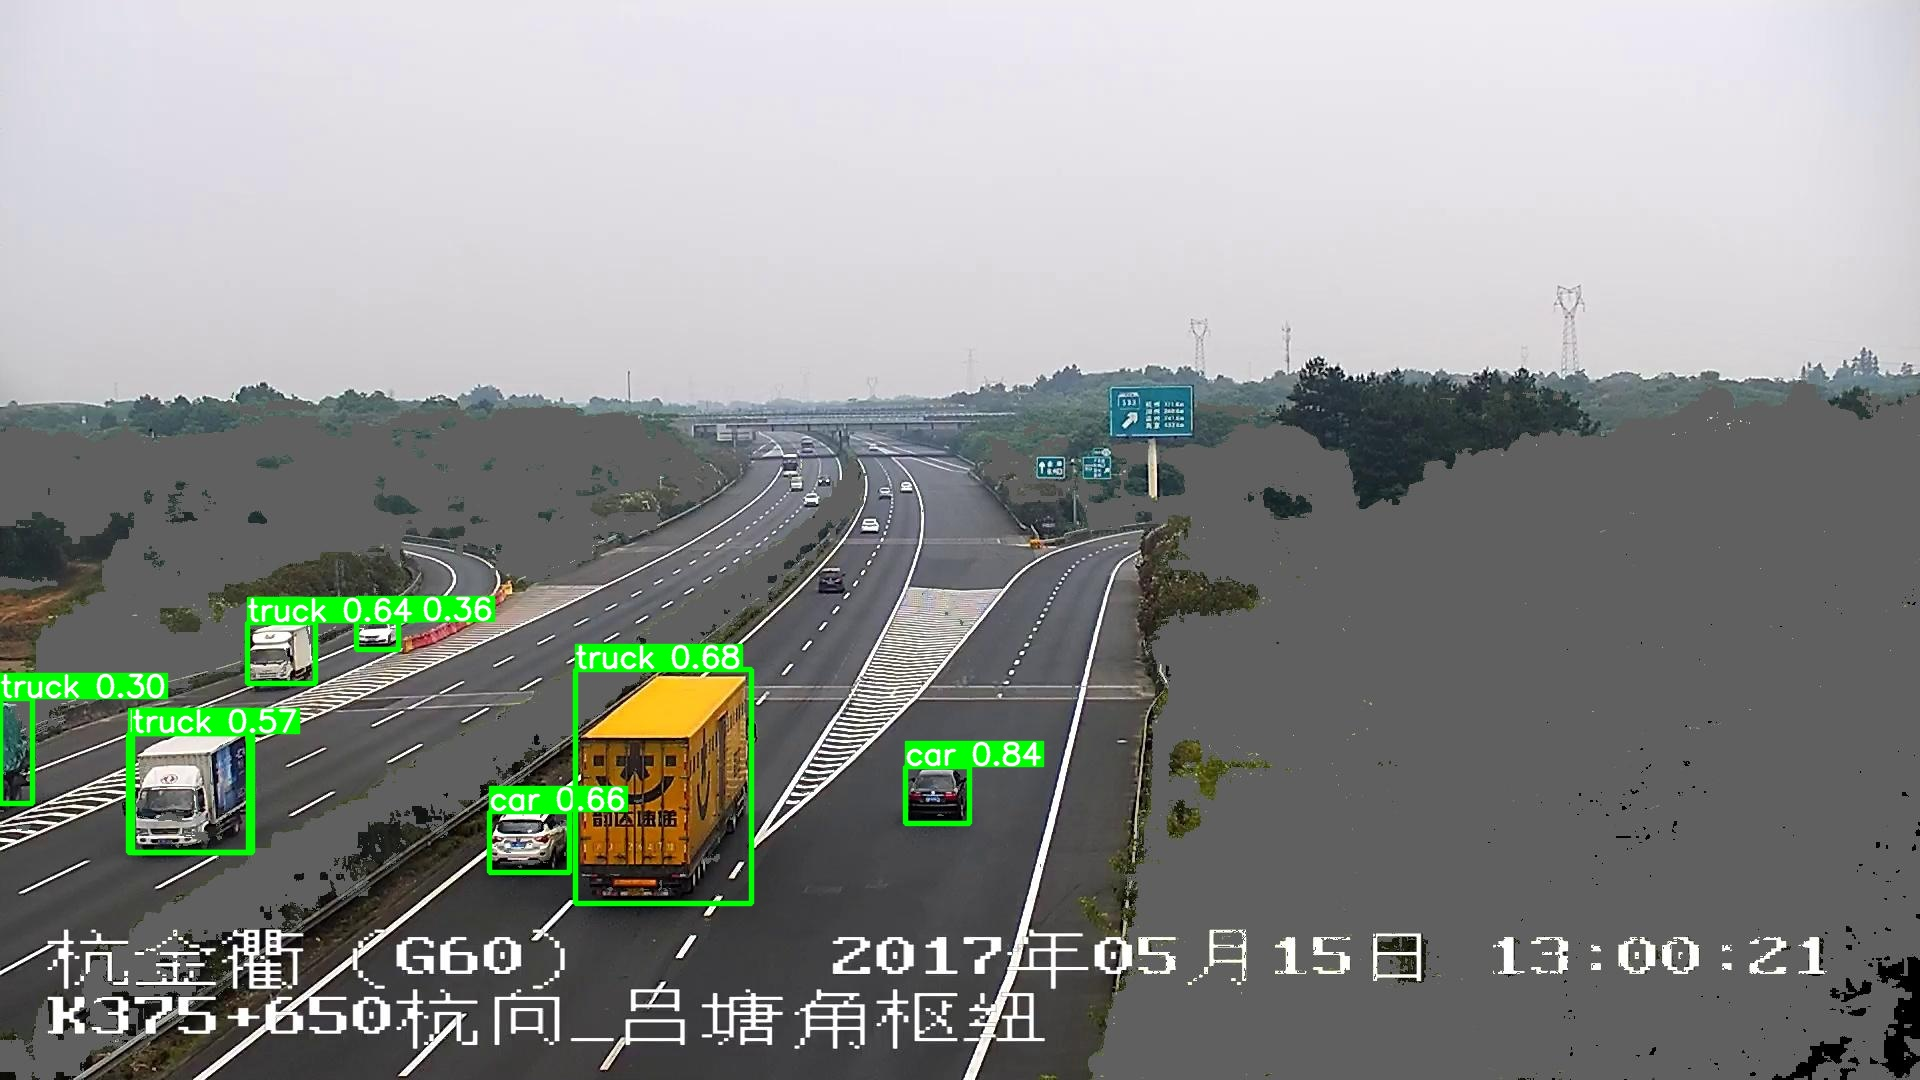

In [70]:
from IPython.display import Image #this is to render predictions
Image(filename=results_folder_path+'/'+image_name+'_green_mask_remove.jpg', width=700)

#####  * Counting all vehicles 

In [71]:
#define vehicle count veriables
total_count = 0
car_count = 0
bus_count = 0
truck_count = 0

try:
    file1 = open(results_folder_path+'/labels/'+image_name+'_green_mask_remove.txt', 'r')
    Lines = file1.readlines()

    # Strips the newline character
    for line in Lines:
        if(line.strip().split()[0]=="2"):
            car_count+=1
        elif(line.strip().split()[0]=="5"):
            bus_count+=1
        elif(line.strip().split()[0]=="7"):
            truck_count+=1
    
    total_count=car_count+bus_count+truck_count
except:
    total_count=0


#####  * Printing total vehicles count

In [72]:
print("______________________\n")
print("  Total Vehicles: {}".format(total_count))
print("______________________")

______________________

  Total Vehicles: 8
______________________
